In [169]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
pwd

'/home/jovyan/protasov/LR_Transfer/notebooks'

In [6]:
path = "/home/jovyan/protasov/LR_Transfer/data/launched_experiments/"

In [7]:
logs = list(Path(path).glob("**/*log_results.json"))

In [8]:
groupped_log = {}

for log in logs:
    hr_lang = log.parts[-3].split("_")[-1]
    log_id = log.parts[-2]
    
    with open(log) as f:
        log_data = json.load(f)
        
    if hr_lang not in groupped_log:
        groupped_log[hr_lang] = {}
    
    if log_id not in groupped_log[hr_lang]:
        groupped_log[hr_lang][log_id] = log_data

In [9]:
for k, v in groupped_log.items():
    print(k, len(v))

Galician 5
English 5
Lithuanian 5
French 5
Afrikaans 5
German 5
Asturian 5
Slovene 5
Hindi 5
Javanese 5


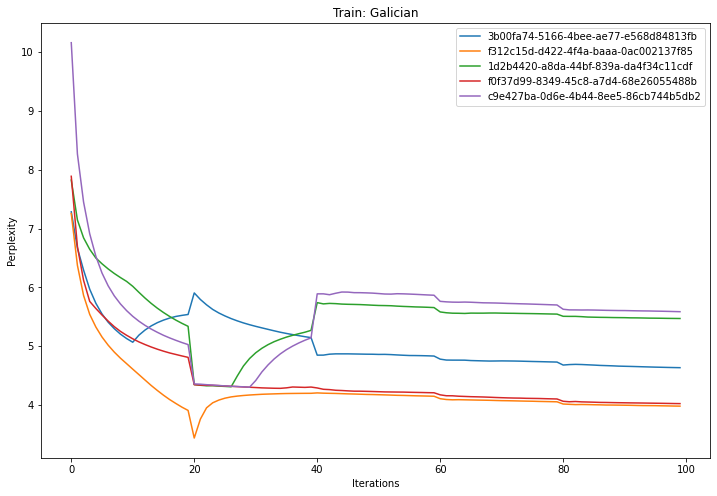

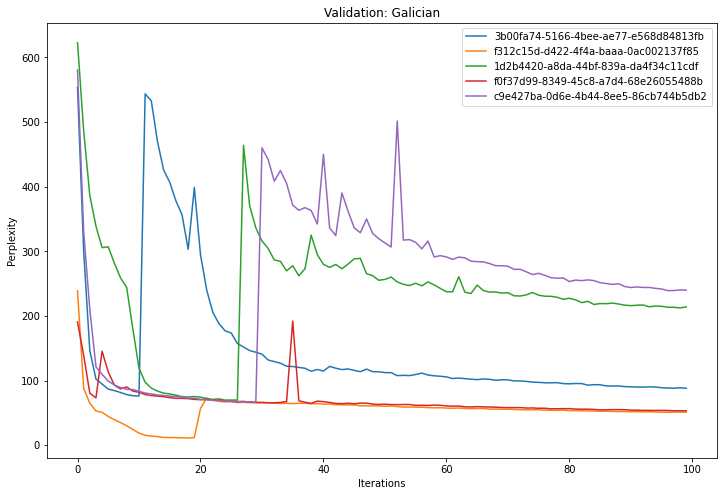

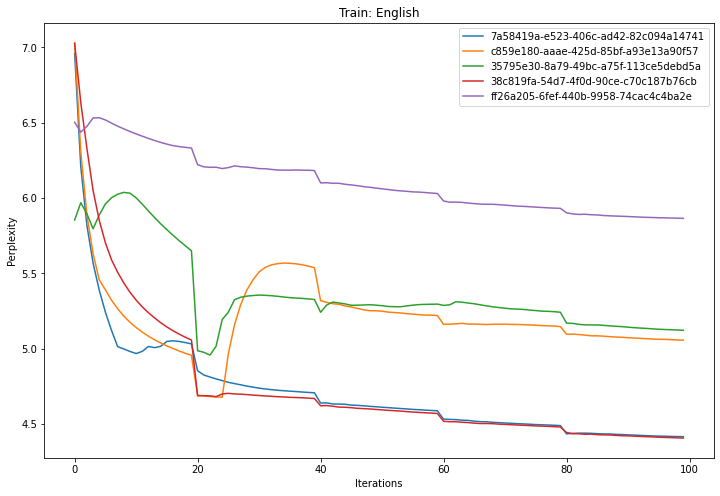

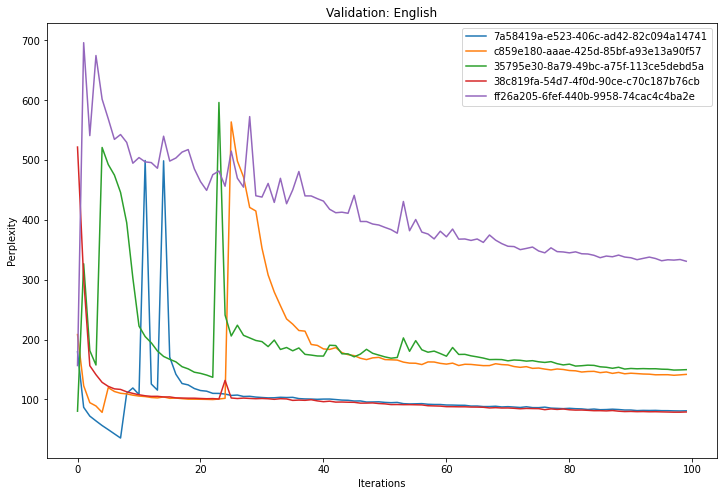

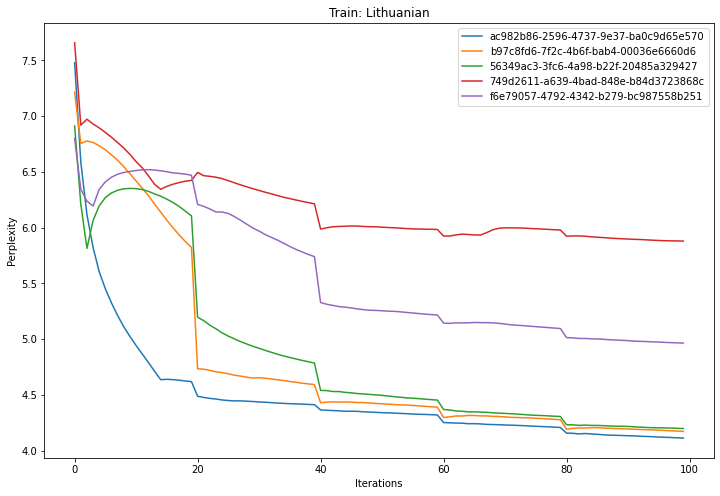

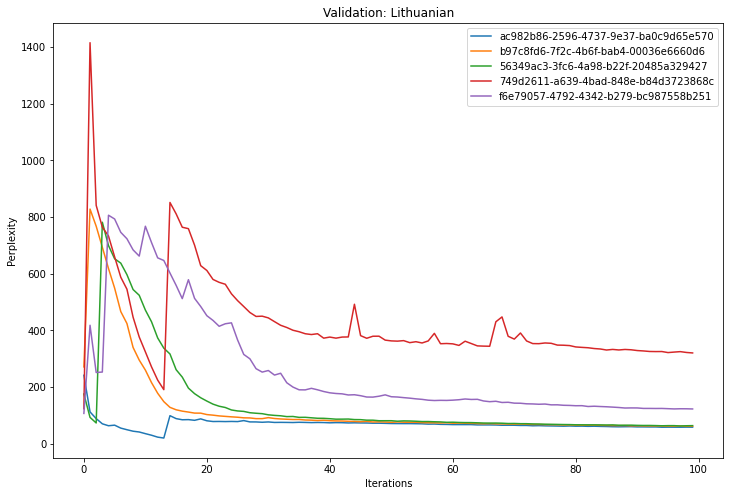

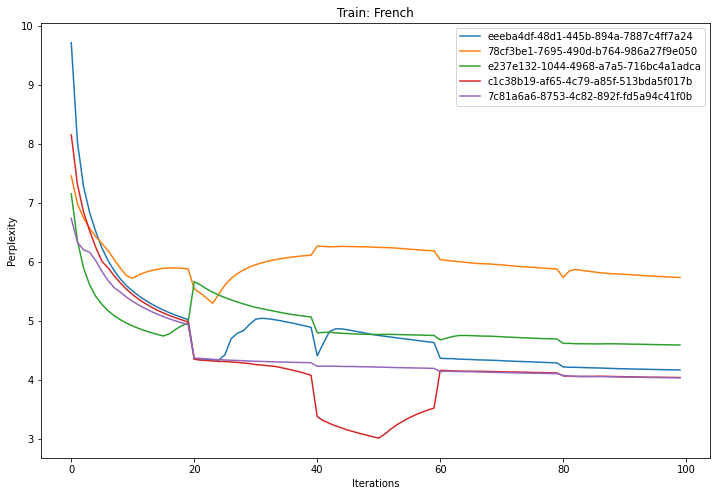

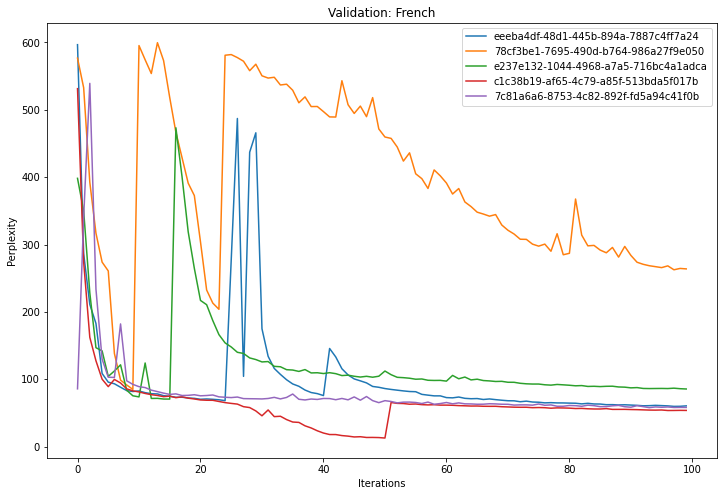

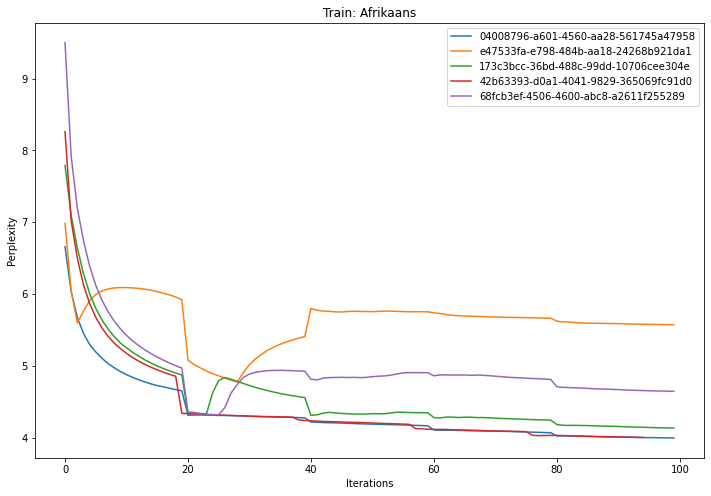

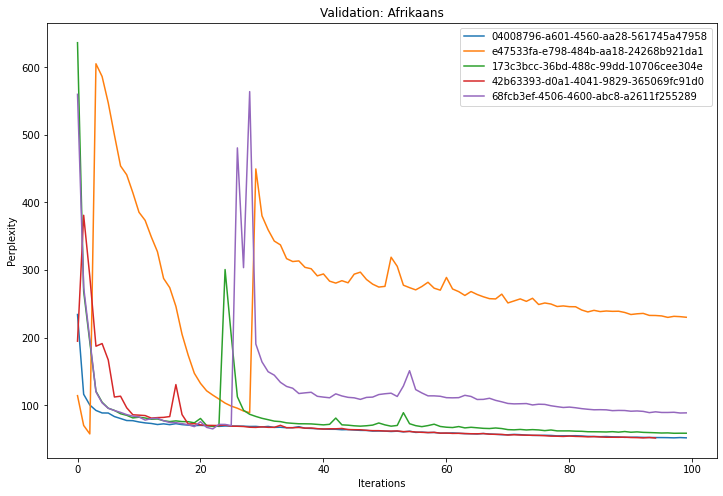

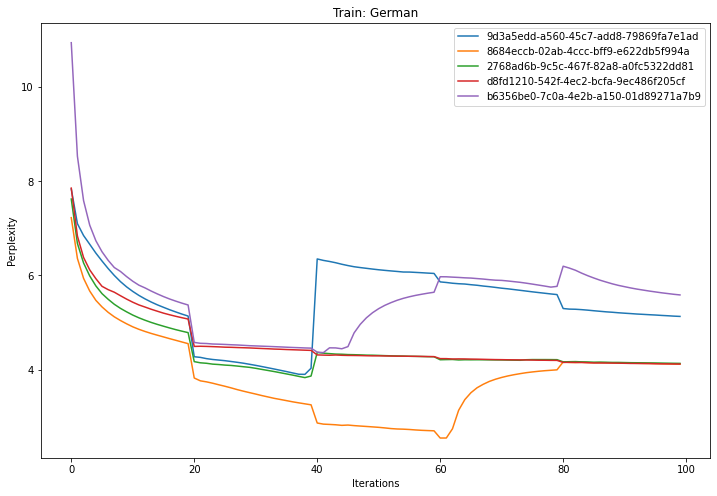

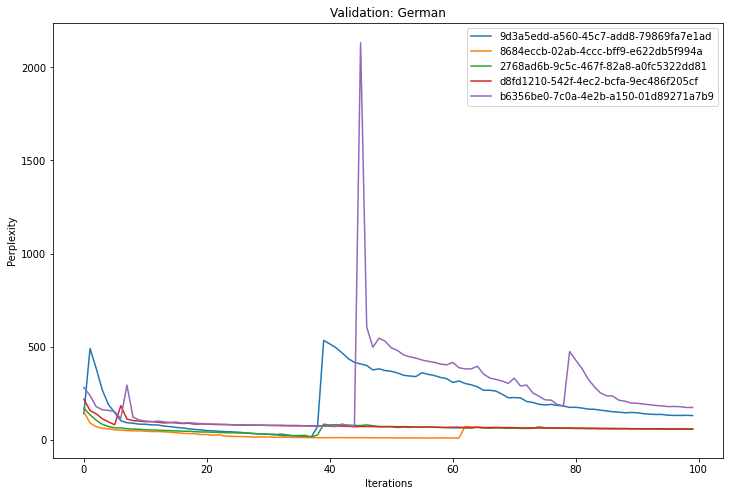

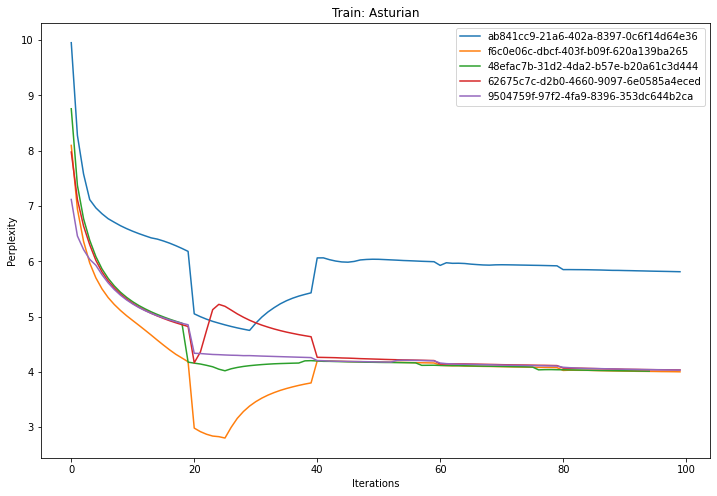

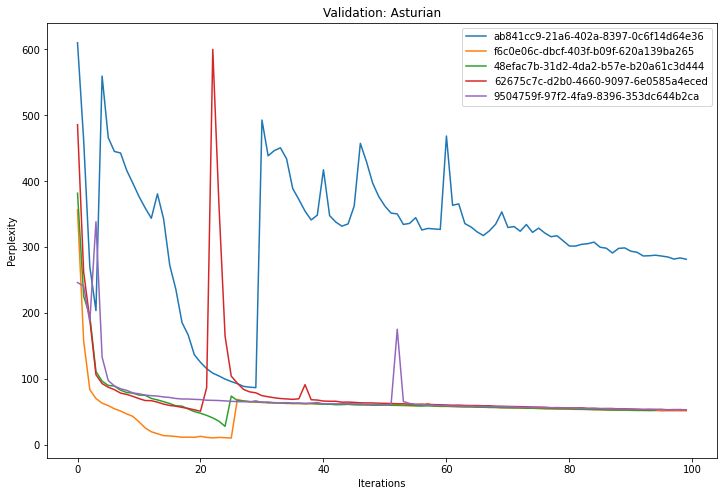

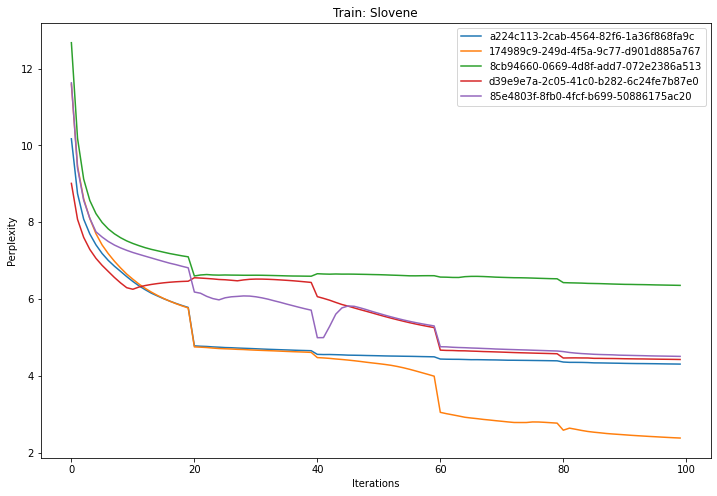

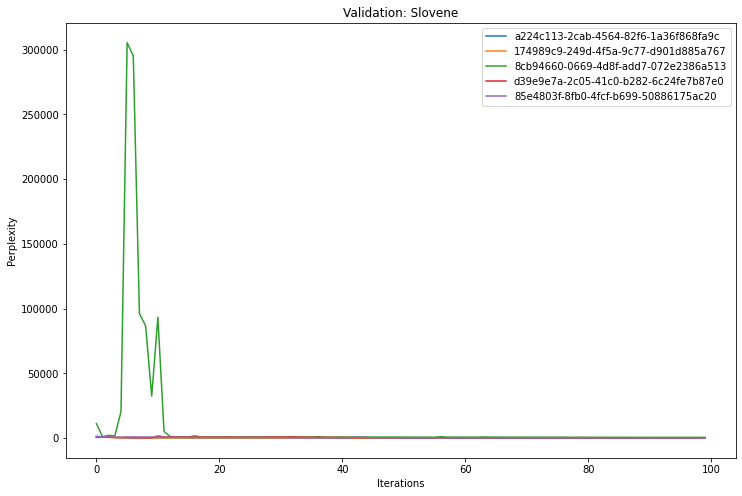

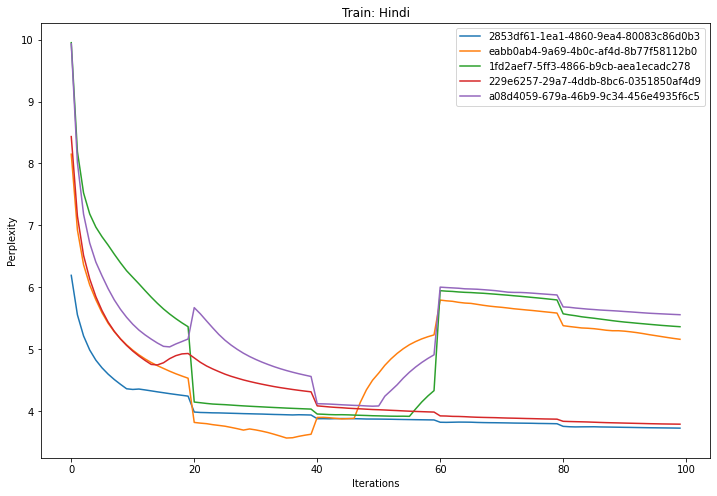

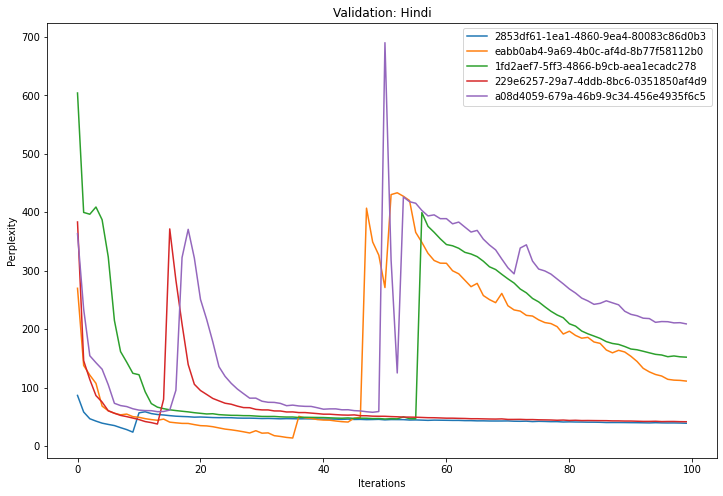

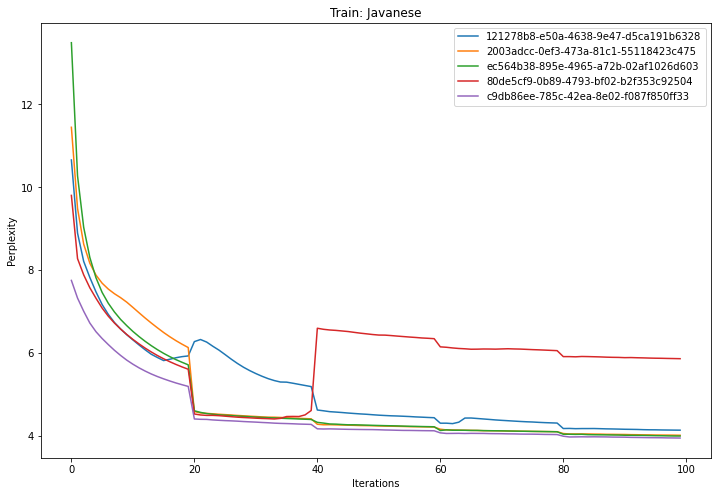

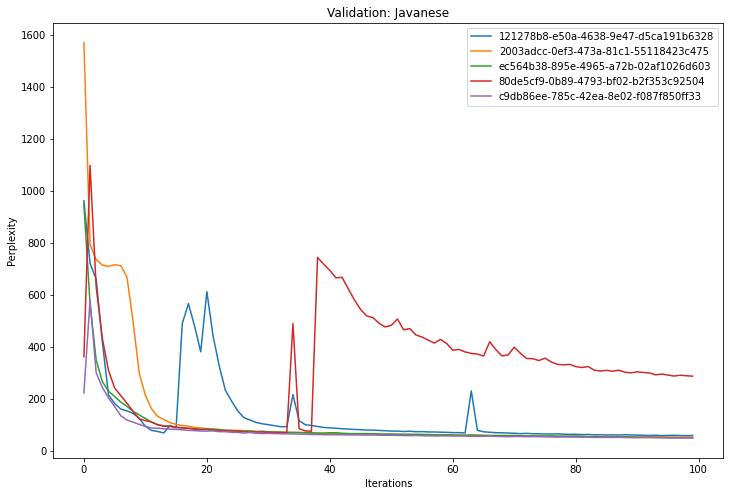

In [10]:
for hr_lang, run_id_dict in groupped_log.items():
    fig_train, ax_train = plt.subplots(figsize=(12, 8))
    fig_val, ax_val = plt.subplots(figsize=(12, 8))
    
    for run_id, run_res in run_id_dict.items():
        for stage, list_res in run_res.items():
            if stage == "train":
                ax_train.plot(list_res, label=run_id)
            elif stage == "val":
                ax_val.plot(list_res, label=run_id)

    ax_train.set_xlabel('Iterations')
    ax_train.set_ylabel('Perplexity')
    ax_train.set_title(f"Train: {hr_lang}")

    ax_val.set_xlabel('Iterations')
    ax_val.set_ylabel('Perplexity')
    ax_val.set_title(f"Validation: {hr_lang}")
    
    ax_train.legend()
    ax_val.legend()

    # Show the plot
    plt.show()

In [179]:
lr_langs_log = "/home/jovyan/protasov/LR_Transfer/data/logs/"
logs = list(Path(lr_langs_log).glob("log_2023-12*.json"))

for l in logs:

    l = str(l)
    with open(l) as f:
        l_data = json.load(f)
    
    hr_name_path = Path(list(l_data.keys())[0]).parent.parent
    total_cpts = len(list(hr_name_path.glob("**/*.pt")))
    
    print(l, f"| {len(l_data)}/{total_cpts}", hr_name_path)
    print()

/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-13 11:46:24.json | 33/495 /home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_Asturian

/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-11 00:45:34.json | 495/495 /home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_Asturian

/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-10 23:29:22.json | 251/495 /home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_Afrikaans

/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-11 00:47:04.json | 500/500 /home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_English

/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-13 11:47:08.json | 32/500 /home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_English



# Plot results

In [189]:
lr_langs = ['Akan',
 'Atikamekw',
 'Bambara',
 'Bhojpuri',
 'Chichewa',
 'Cantonese',
 'Coptic',
 'Dagbani',
 'Greenlandic (South)',
 'Guaraní',
 'Kashmiri',
 'Kurmanji',
 'Koryak',
 'Komi-Zyrian',
 'Madurese',
 'Nanai',
 'Quiché',
 'Romani (Lovari)',
 'Rundi',
 'Samoan',
 'Sesotho',
 'Shor',
 'Sranan',
 'Swati',
 'Tabassaran',
 'Tat (Muslim)',
 'Tofa',
 'Tsakhur',
 'Tsonga',
 'Udi',
 'Yukaghir (Kolyma)']

In [67]:
log_path = "/home/jovyan/protasov/LR_Transfer/data/logs/log_2023-12-10 23:29:22.json"

In [68]:
with open(log_path) as f:
    f_data = json.load(f)

In [193]:
all_results = {
    "hr_lang": [],
    "run_id": [],
    "epoch": [],
    "iteration": [],
}


for checkpoint_path, lr_results in f_data.items():
    hr_lang = str(Path(checkpoint_path).parent.parent).split("training_on_")[-1]
    run_id = str(Path(checkpoint_path).parent.stem)
    epoch_ = int(Path(checkpoint_path).stem.split("_")[4])
    iter_ = int(Path(checkpoint_path).stem.split("_")[2])
    
    if len(lr_results) != len(lr_langs):
        print(checkpoint_path)
        continue
    
    
    all_results["hr_lang"].append(hr_lang)
    all_results["run_id"].append(run_id)
    all_results["epoch"].append(epoch_)
    all_results["iteration"].append(iter_)
        
    
    for lr_lang, lr_score in lr_results.items():
        if lr_lang not in all_results:
            all_results[lr_lang] = []
        
        all_results[lr_lang].append(lr_score)
    
    
pd.DataFrame(all_results).sort_values(by=["run_id", "epoch", "iteration"])

/home/jovyan/protasov/LR_Transfer/data/launched_experiments/training_on_Afrikaans/173c3bcc-36bd-488c-99dd-10706cee304e/model_iter_7866_epoch_1.pt


,hr_lang,run_id,epoch,iteration,Akan,Atikamekw,Bambara,Bhojpuri,Chichewa,Cantonese,...,Shor,Sranan,Swati,Tabassaran,Tat (Muslim),Tofa,Tsakhur,Tsonga,Udi,Yukaghir (Kolyma)
0,Afrikaans,04008796-a601-4560-aa28-561745a47958,0,414,886.523419,1228.451051,1099.128666,None,1486.890507,3097.968148,...,1361.036159,814.486497,1617.336560,1168.034393,1497.271094,1944.626010,1464.173456,1527.145120,1308.679548,1878.375729
1,Afrikaans,04008796-a601-4560-aa28-561745a47958,0,828,751.794321,963.711195,897.233097,None,1702.528512,2501.639976,...,2225.129453,713.043723,1477.019072,2012.551944,2997.084952,2792.784556,2028.478444,1525.588855,2473.391880,2122.494786
2,Afrikaans,04008796-a601-4560-aa28-561745a47958,0,1242,674.277294,1001.385818,852.848977,None,1832.387710,4386.867329,...,3737.193222,748.365113,1570.518402,3380.360593,5127.947494,4937.600963,3026.394637,1646.662341,5112.049400,3446.931969
3,Afrikaans,04008796-a601-4560-aa28-561745a47958,0,1656,741.280366,1059.508508,917.774308,None,1871.109439,4198.399772,...,4347.734973,788.682067,1457.780501,3534.045192,6560.865473,5407.529840,2860.120052,1649.769789,5590.025715,4901.709244
4,Afrikaans,04008796-a601-4560-aa28-561745a47958,0,2070,649.470280,996.358014,848.127893,None,1886.429698,3445.791482,...,3518.009012,649.782659,1415.199894,2972.422216,5242.559031,3970.180086,2522.227059,1627.609062,4174.661512,3161.918402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Afrikaans,e47533fa-e798-484b-aa18-24268b921da1,4,6624,1750.678166,2630.951548,2077.053685,None,6235.583941,131870.111820,...,41135.008852,1355.798880,3989.199794,40943.111197,110576.594166,79523.416214,36423.762478,4210.335873,69332.086977,66146.074084
196,Afrikaans,e47533fa-e798-484b-aa18-24268b921da1,4,7038,1712.607544,2630.064741,2255.783048,None,6695.356564,124117.843006,...,38701.972228,1403.626987,4000.780036,39911.538676,103290.511968,77221.460121,37310.283665,4306.292112,70772.152681,67770.242676
197,Afrikaans,e47533fa-e798-484b-aa18-24268b921da1,4,7452,1721.051304,2624.023179,2135.983132,None,6208.260541,118877.882865,...,38855.290922,1472.839687,4122.820221,38510.342625,102566.484836,89170.190745,34718.677024,4371.373280,65030.561146,73158.748867
198,Afrikaans,e47533fa-e798-484b-aa18-24268b921da1,4,7866,1735.211773,2643.904157,2152.657329,None,6506.924084,145982.360312,...,42298.280002,1494.644977,4106.452862,39939.727644,109131.382837,79829.865624,39727.055037,4475.516899,70478.747013,73217.448654


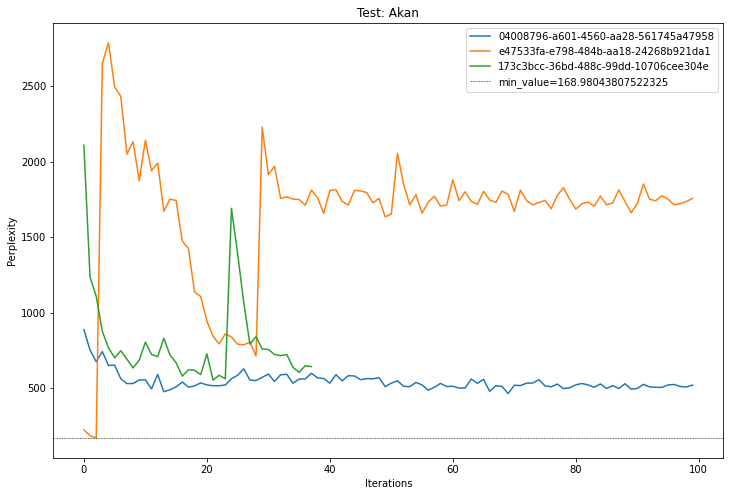

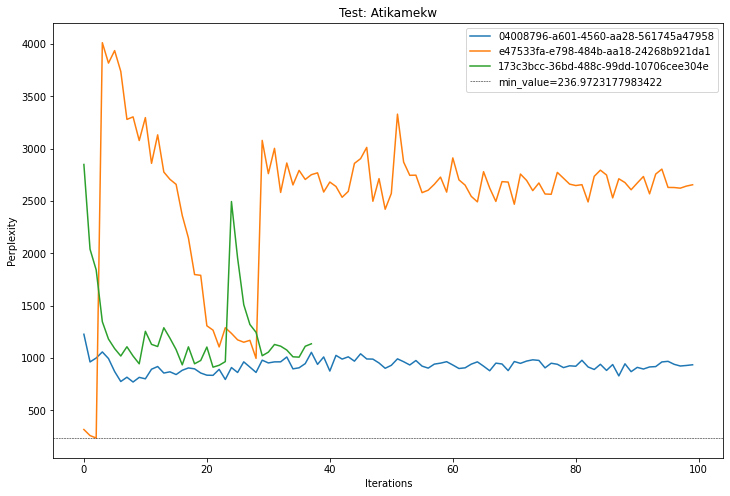

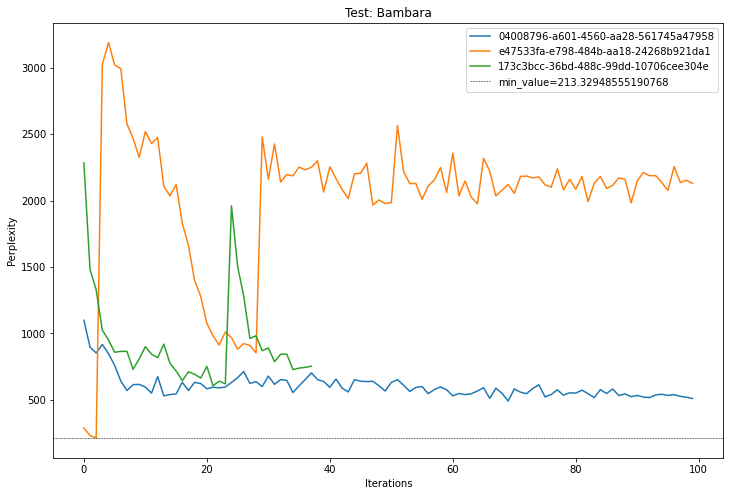

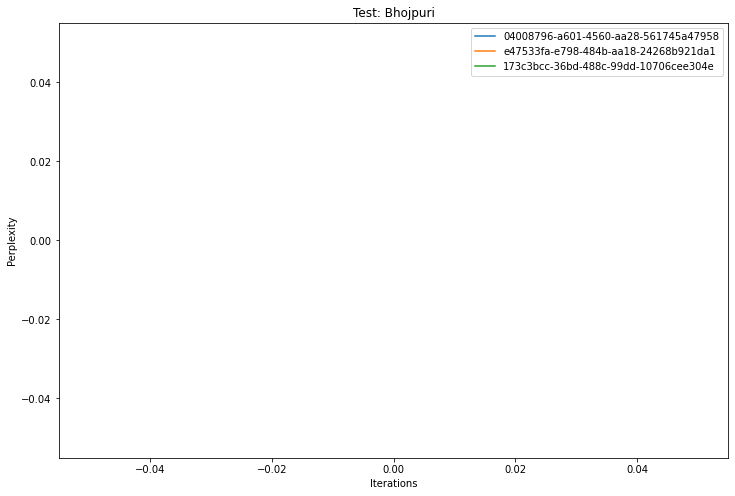

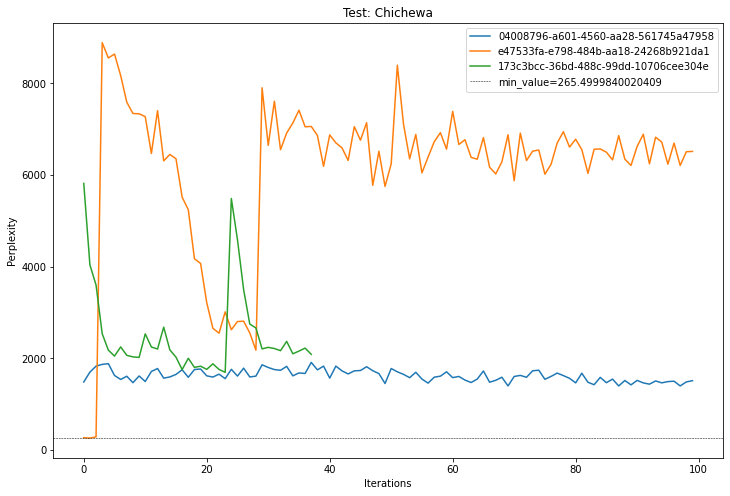

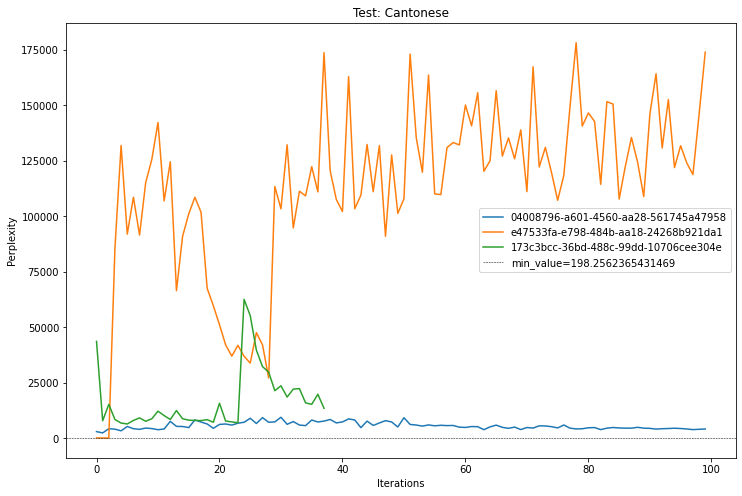

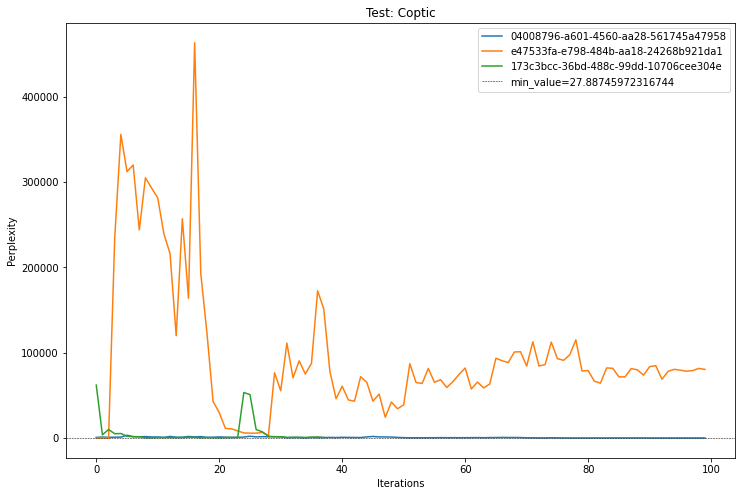

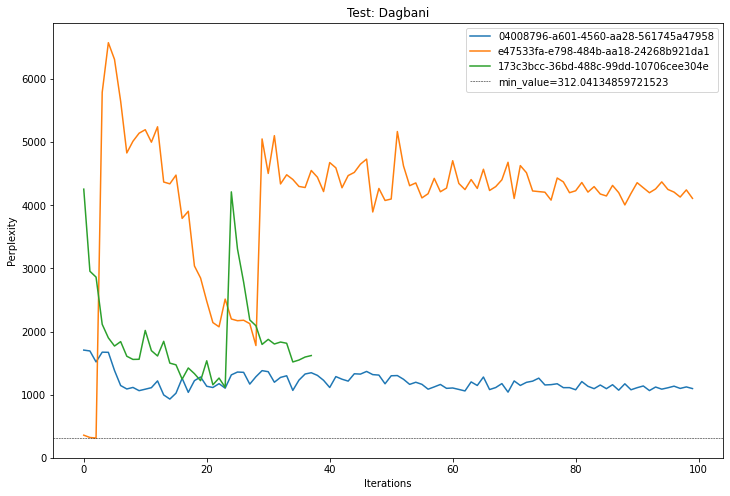

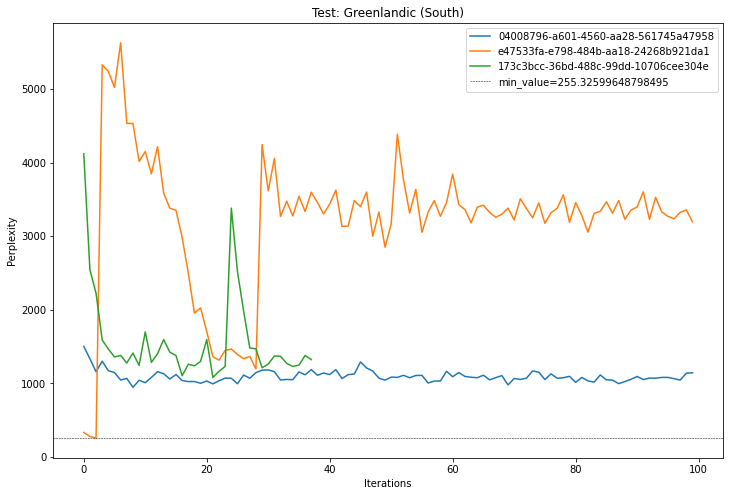

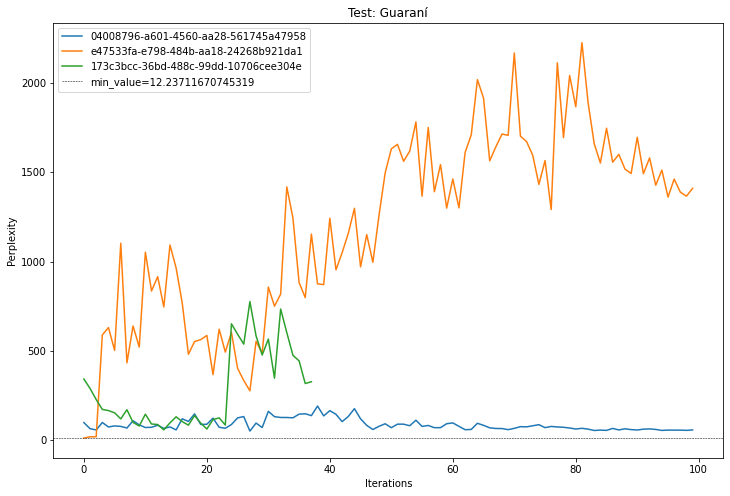

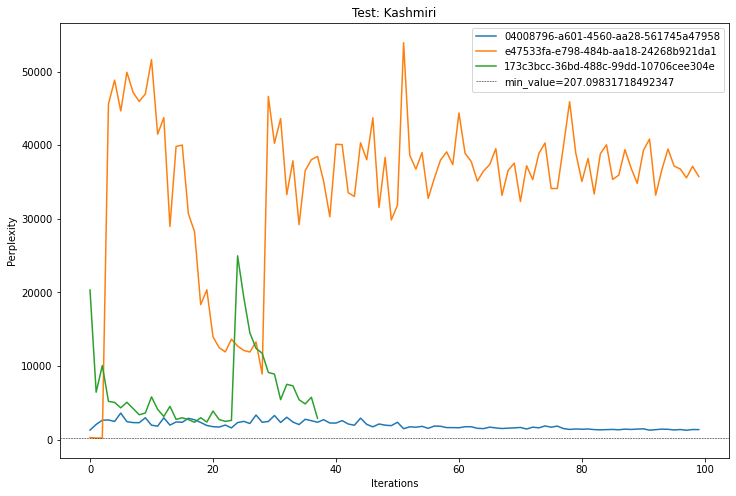

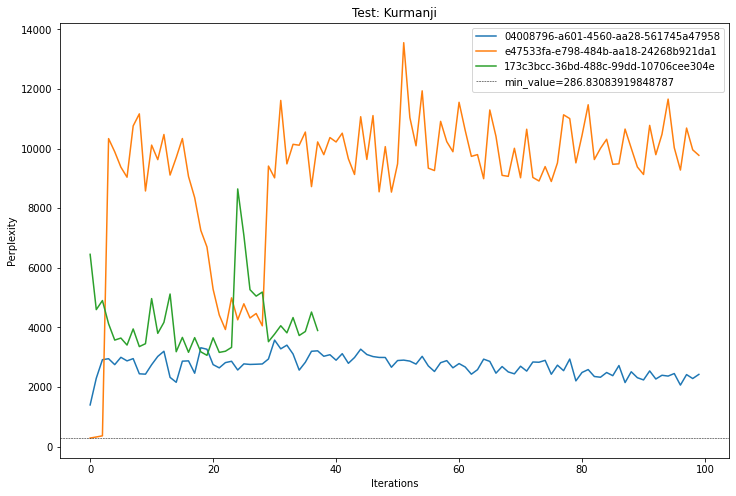

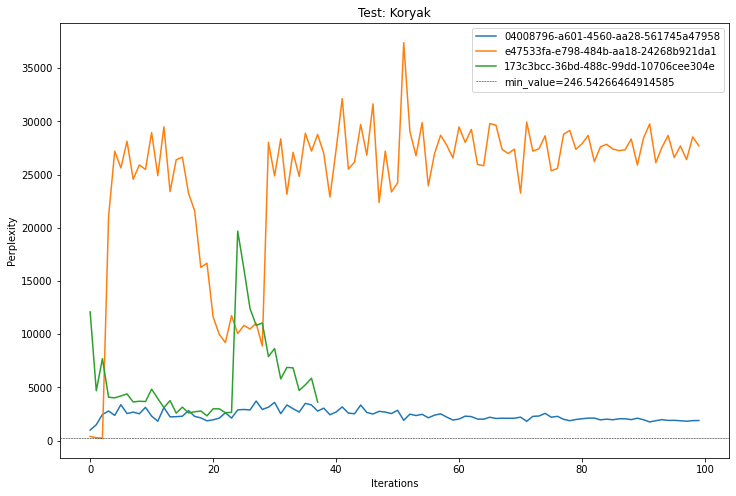

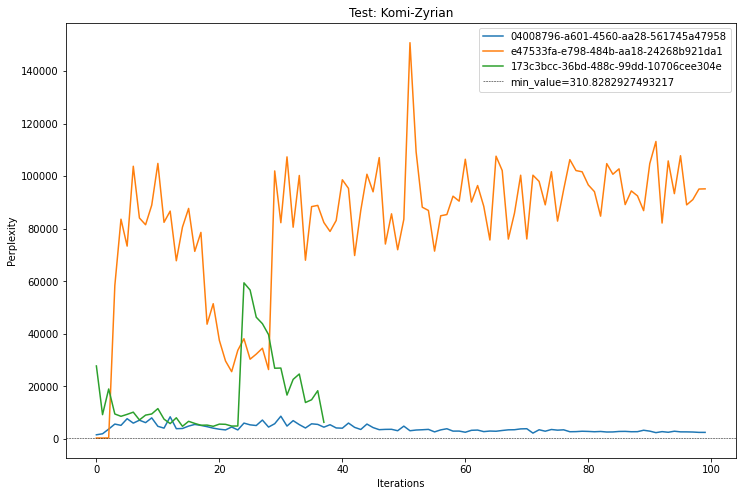

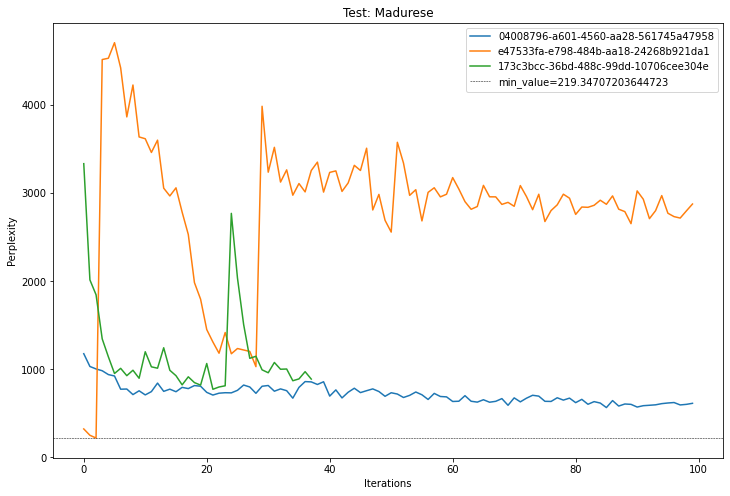

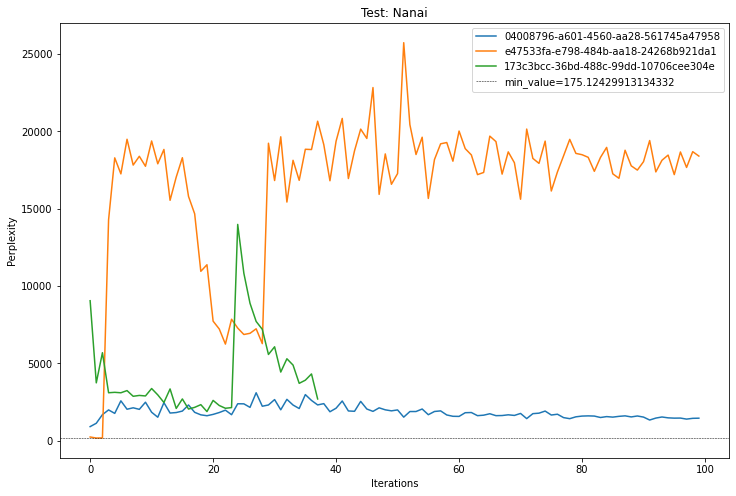

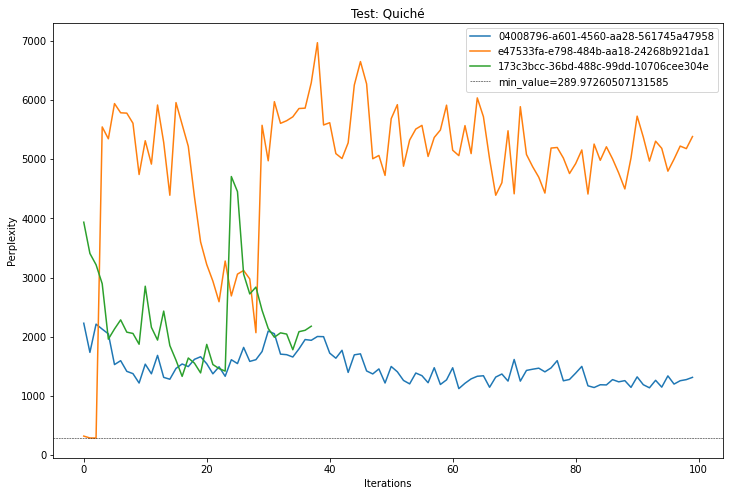

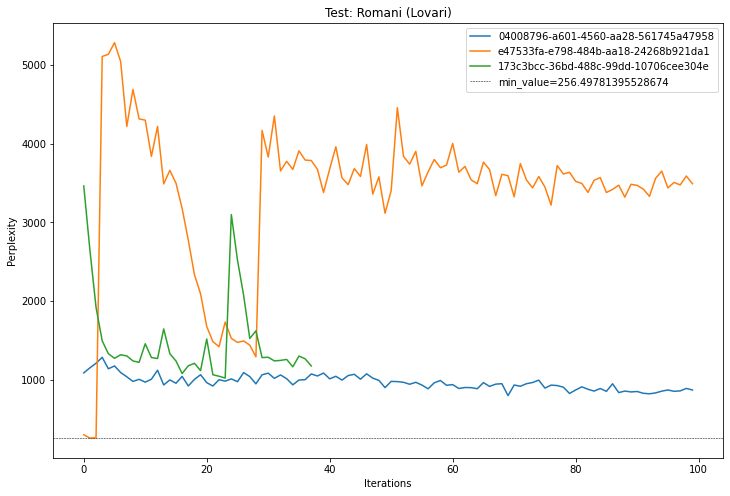

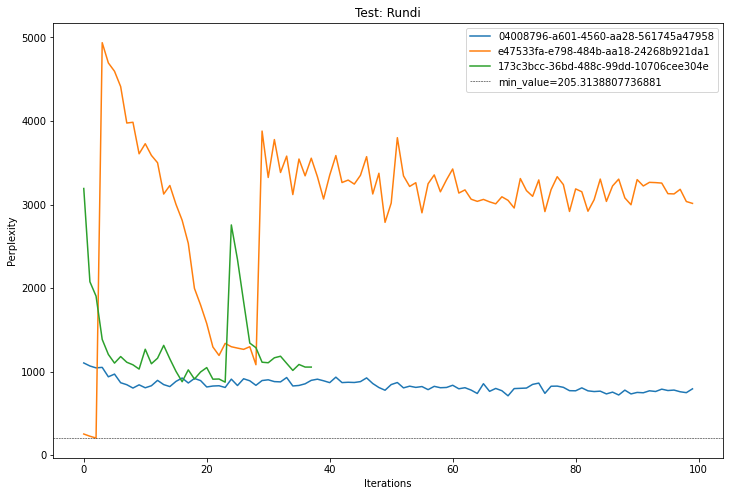

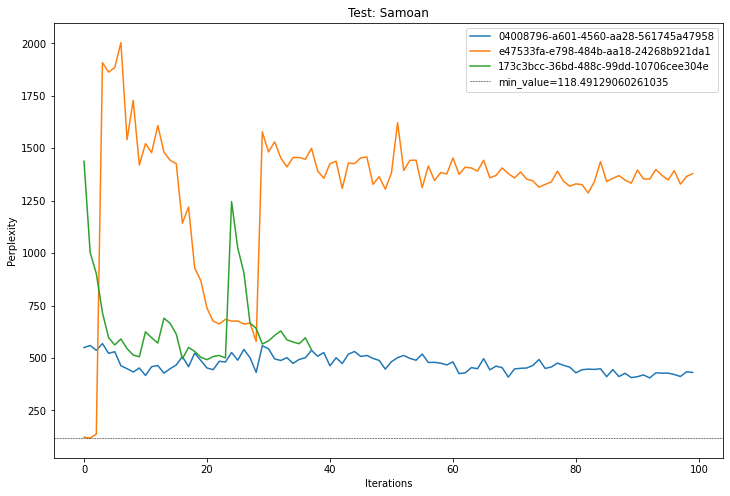

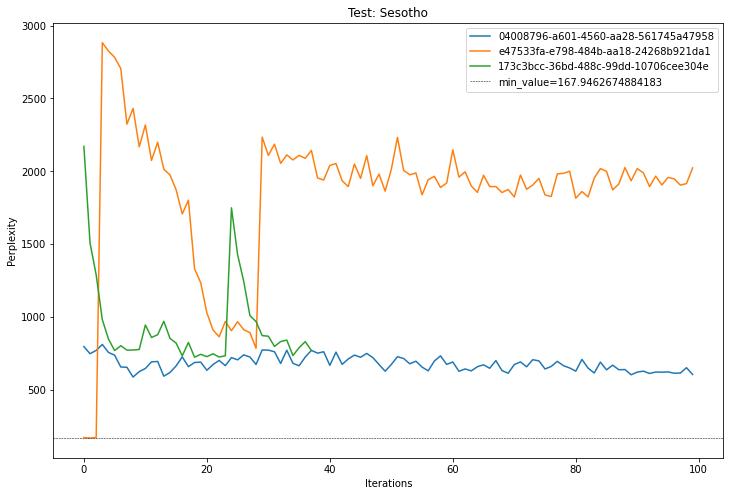

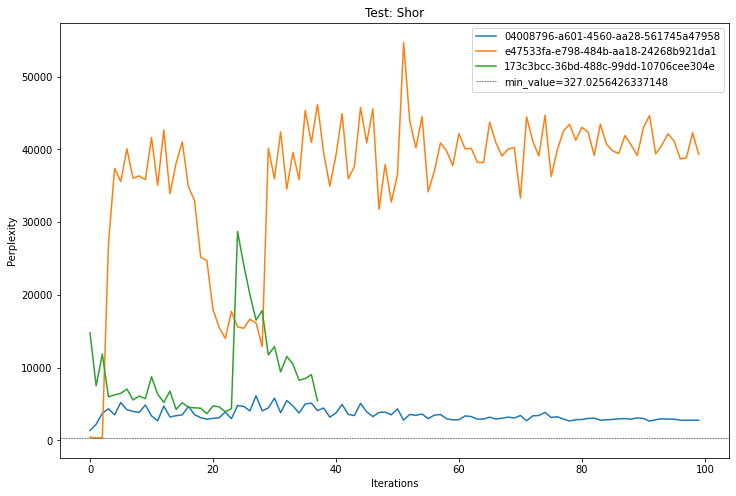

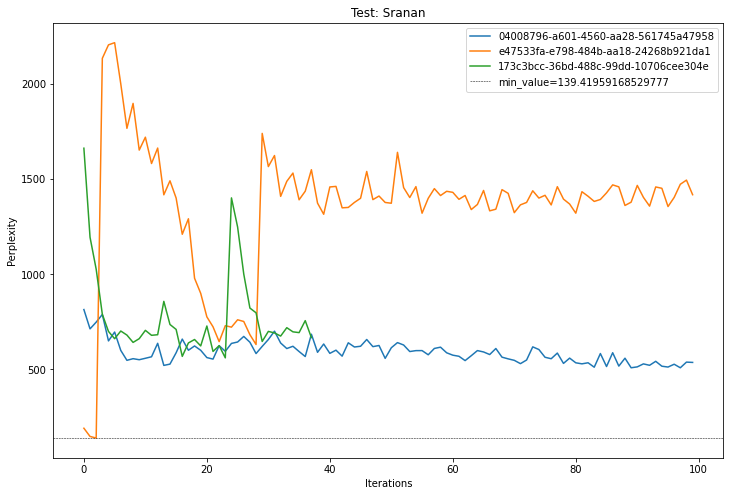

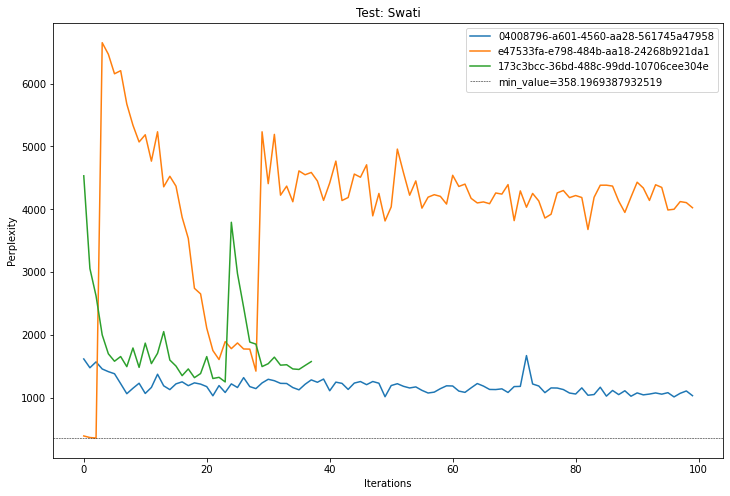

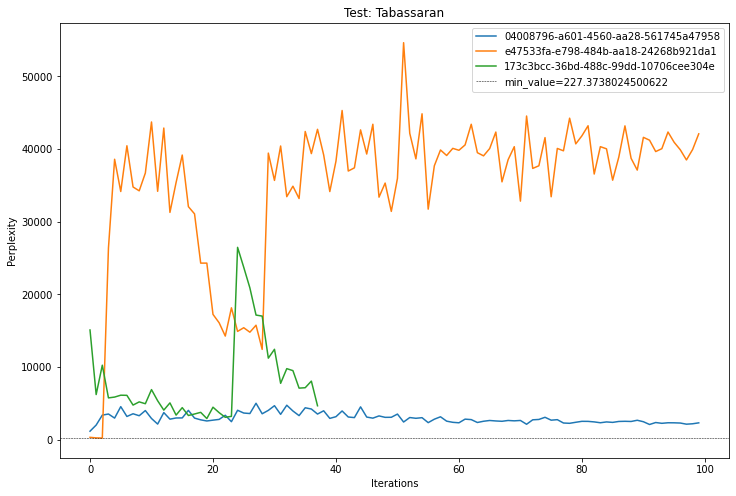

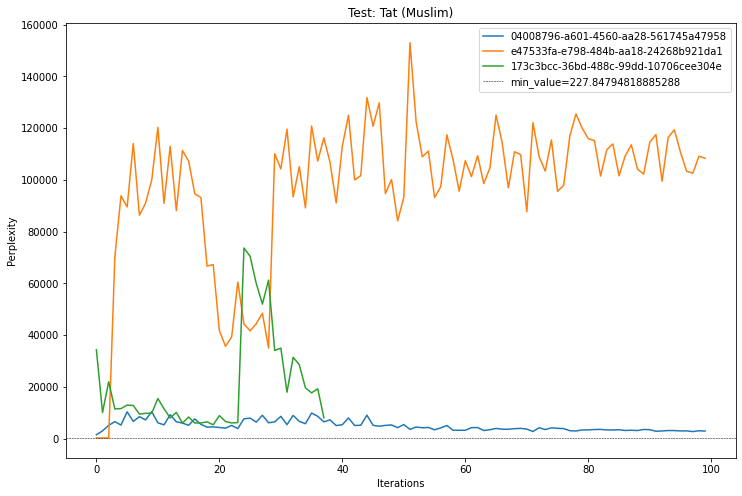

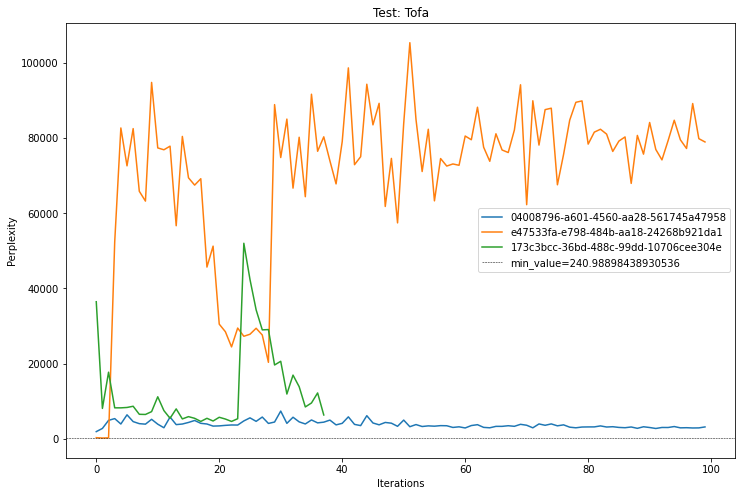

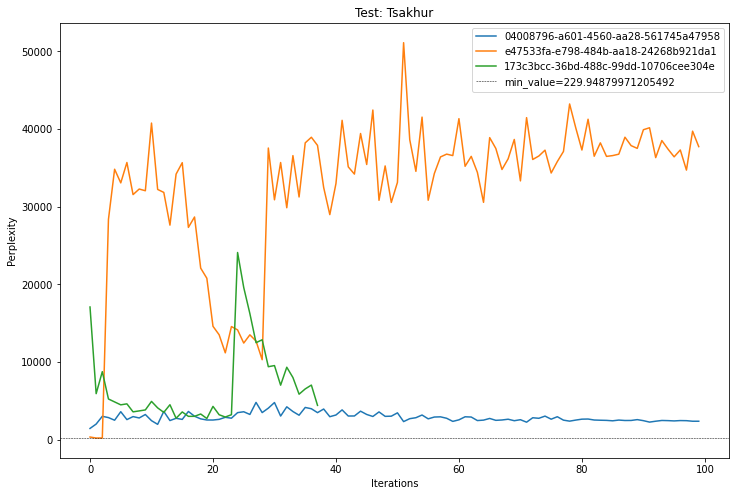

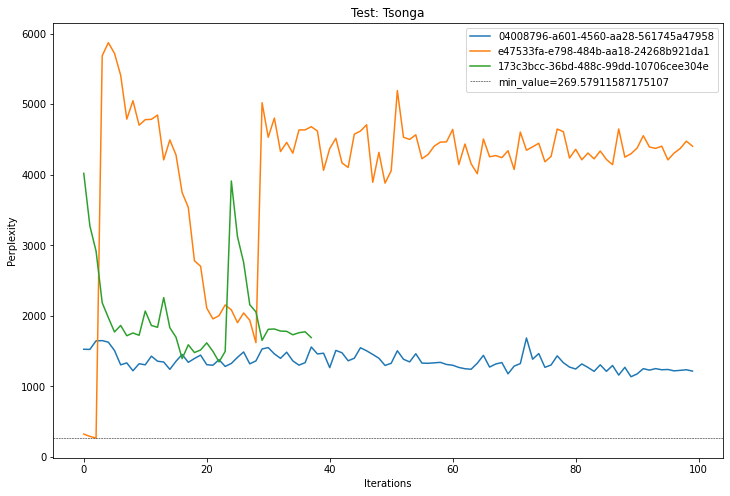

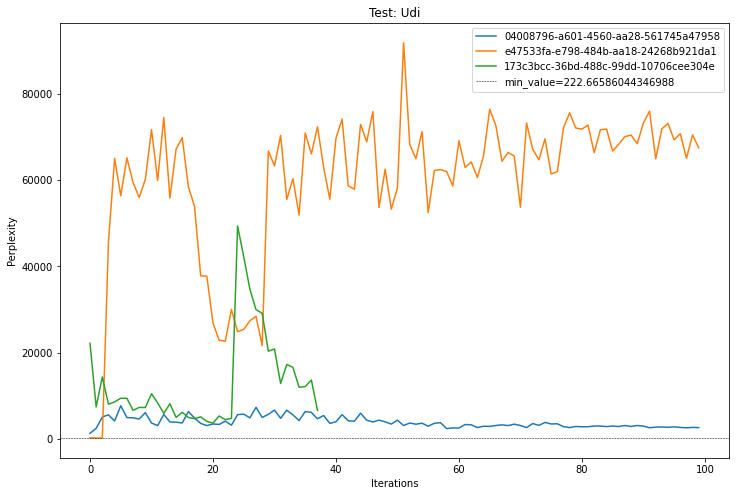

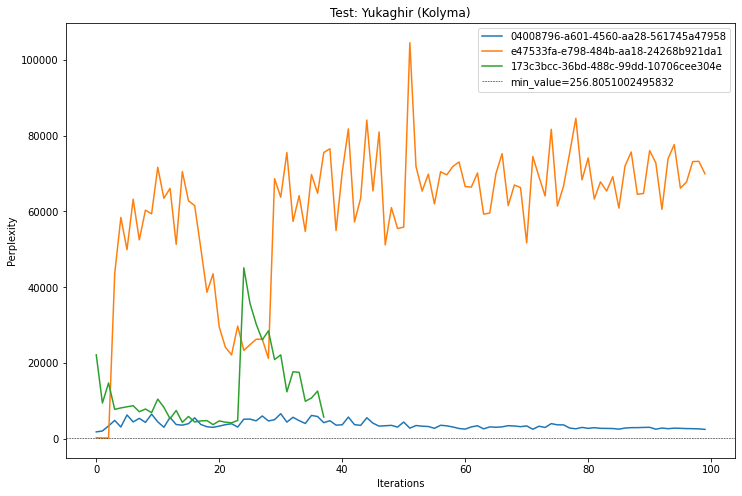

In [209]:
aggr_df = pd.DataFrame(all_results)
hr_lang = "Afrikaans"

for lr_lang in lr_langs:
    lr_scores = aggr_df[lr_lang].tolist()
    lr_run_ids = aggr_df["run_id"].tolist()
    
    run_id_dict = {}
    
    for k, v in zip(lr_run_ids, lr_scores):
        if k not in run_id_dict:
            run_id_dict[k] = []
        
        run_id_dict[k].append(v)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    for run_id, run_res in run_id_dict.items():
        ax.plot(run_res, label=run_id)
        
    
    try:
        plt.axhline(y=min(lr_scores), linewidth=0.5, c="black",  linestyle='dashed', label=f"min_value={min(lr_scores)}")
    except:
        pass
    
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Perplexity')
    ax.set_title(f"Test: {lr_lang}")
    
    ax.legend()
    
    

    plt.show()